In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as scs
import scipy.signal as sig
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn import metrics
from math import sqrt
import math

# 3 Сглаживание

## 3.1. Savitzky–Golay filter (полиномиальное сглаживание) 

Необходимые библиотеки

In [4]:
from scipy.signal import savgol_filter,savgol_coeffs
from statsmodels.tsa.holtwinters import SimpleExpSmoothing, Holt,ExponentialSmoothing

*m = 2, p = 2*

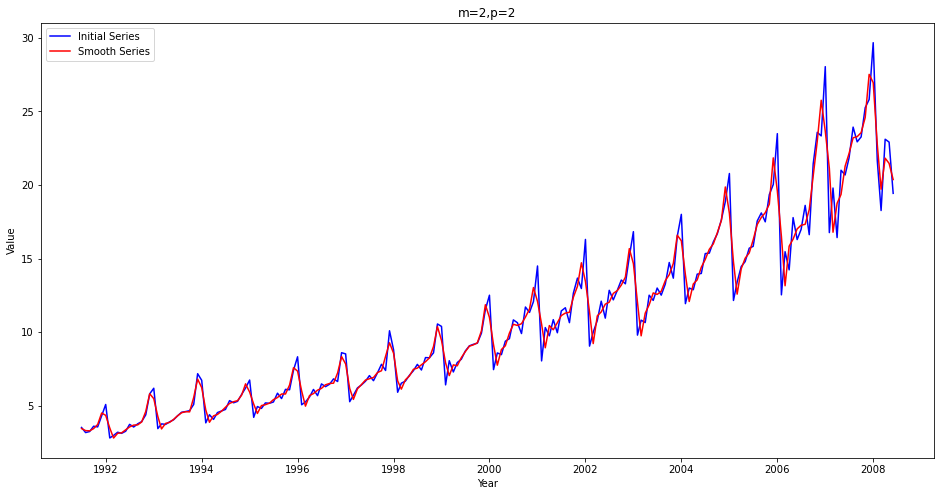

In [25]:
# Сглаживание
df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/a10.csv', parse_dates=['date'], index_col='date')
poly_smooth_2_2 = savgol_filter(df['value'], window_length = 5,polyorder = 2)
poly_smooth_1_1 = savgol_filter(df['value'], window_length = 3,polyorder = 1)
poly_smooth_2_1 = savgol_filter(df['value'], window_length = 5,polyorder = 1)
poly_smooth_1_2 = savgol_filter(df['value'], window_length = 3,polyorder = 2)

df_poly=df.copy()
df_poly['SGF_m=2_p=2']=poly_smooth_2_2
df_poly['SGF_m=1_p=1']=poly_smooth_1_1
df_poly['SGF_m=2_p=1']=poly_smooth_1_1
df_poly['SGF_m=1_p=2']=poly_smooth_1_2


# График
plt.figure(figsize=(16,8))
plt.xlabel('Year')
plt.ylabel('Value')
plt.title("m=2,p=2")
line_1,=plt.plot(df_poly['value'],color='blue')
line_2,=plt.plot(df_poly['SGF_m=2_p=2'],color='red')
plt.legend([line_1,line_2],['Initial Series','Smooth Series'])

plt.show()
plt.show()

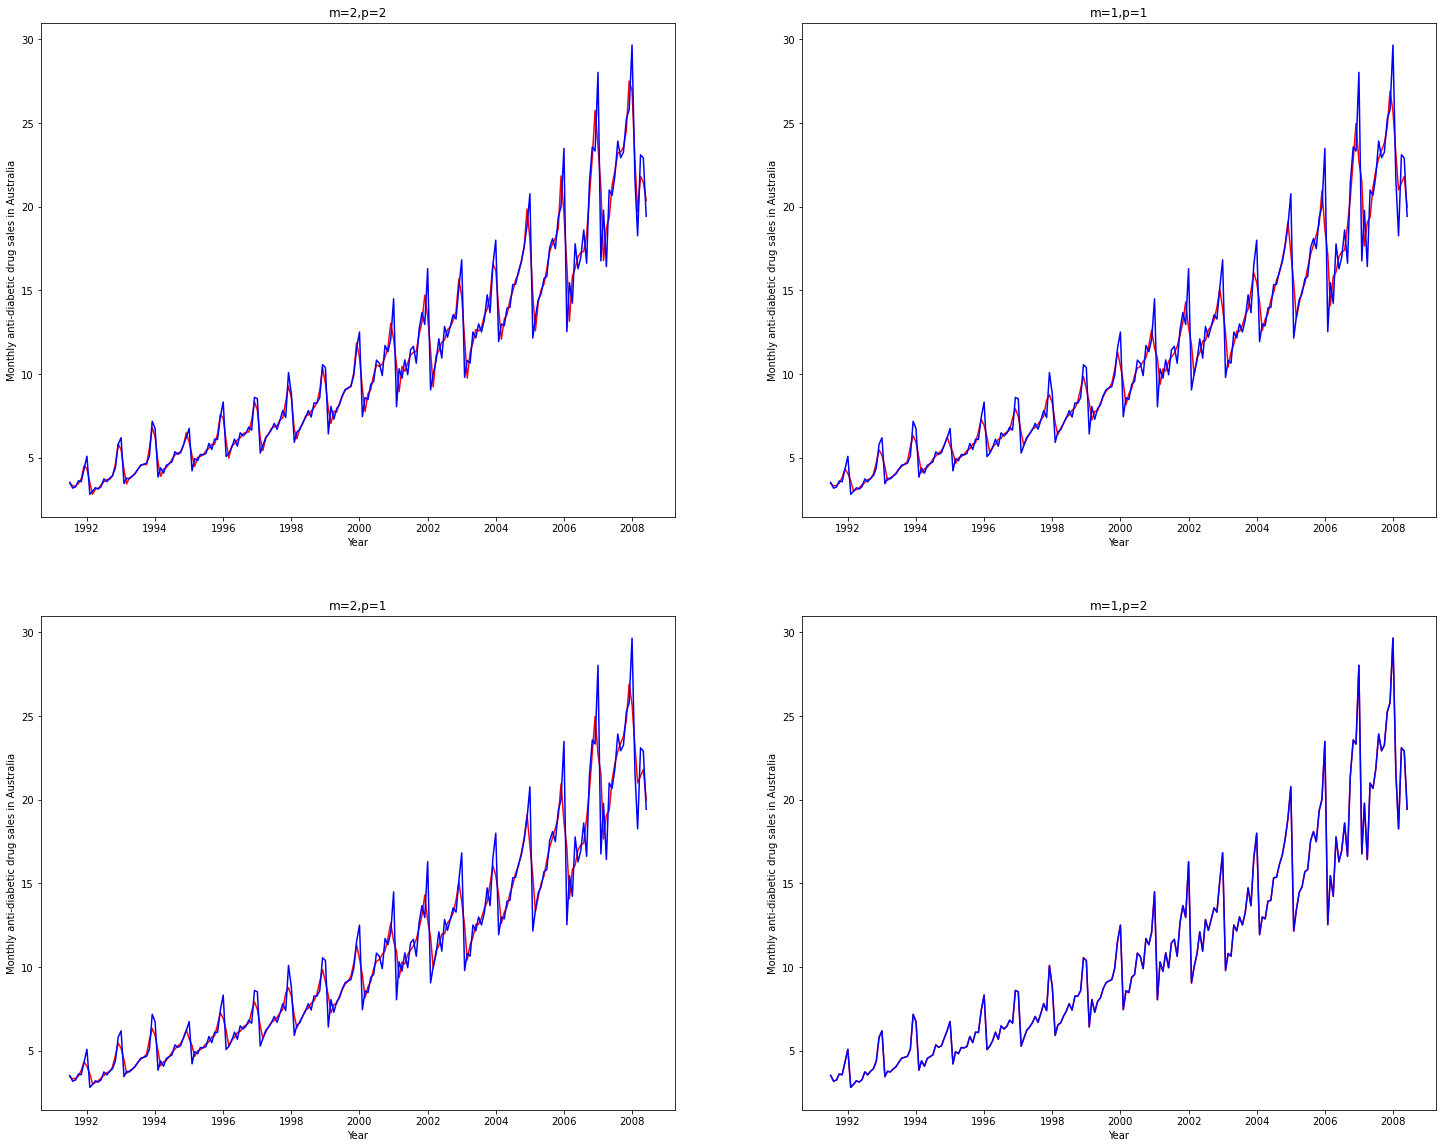

In [29]:
fig, axs = plt.subplots(2, 2, figsize=(25,20))

axs[0, 0].plot(df_poly['SGF_m=2_p=2'],color='red')
axs[0, 0].plot(df,color='blue')
axs[0, 0].set_title('m=2,p=2')
axs[0, 0].set_xlabel('Year')
axs[0, 0].set_ylabel('Monthly anti-diabetic drug sales in Australia')
axs[0, 0].

axs[0, 1].plot(df_poly['SGF_m=1_p=1'],color='red')
axs[0, 1].plot(df,color='blue')
axs[0, 1].set_title('m=1,p=1')
axs[0, 1].set_xlabel('Year')
axs[0, 1].set_ylabel('Monthly anti-diabetic drug sales in Australia')

axs[1, 0].plot(df_poly['SGF_m=2_p=1'],color='red')
axs[1, 0].plot(df,color='blue')
axs[1, 0].set_title('m=2,p=1')
axs[1, 0].set_xlabel('Year')
axs[1, 0].set_ylabel('Monthly anti-diabetic drug sales in Australia')

axs[1, 1].plot(df_poly['SGF_m=1_p=2'],color='red')
axs[1, 1].plot(df,color='blue')
axs[1, 1].set_title('m=1,p=2')
axs[1, 1].set_xlabel('Year')
axs[1, 1].set_ylabel('Monthly anti-diabetic drug sales in Australia')

plt.show()

In [30]:
df_poly

,value,SGF_m=2_p=2,SGF_m=1_p=1,SGF_m=2_p=1,SGF_m=1_p=2
date,,,,,
1991-07-01,3.526591,3.452522,3.457086,3.457086,3.526591
1991-08-01,3.180891,3.312978,3.319901,3.319901,3.180891
1991-09-01,3.252221,3.300374,3.348038,3.348038,3.252221
1991-10-01,3.611003,3.449781,3.476364,3.476364,3.611003
1991-11-01,3.565869,3.731617,3.827748,3.827748,3.565869
...,...,...,...,...,...
2008-02-01,21.654285,22.758433,23.194862,23.194862,21.654285
2008-03-01,18.264945,19.711829,21.008969,21.008969,18.264945
2008-04-01,23.107677,21.820054,21.428377,21.428377,23.107677


## 3.2. Simple Exponential Smoothing (экспоненциальное сглаживание)

Простое экспоненциальное сглаживание проводится с помощью рекуррентной формулы:

$$s_t=αx_t+(1-α)s_{t-1}$$

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Import Statsmodels
from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import adfuller
from statsmodels.tools.eval_measures import rmse, aic

$$α=0.5$$

In [38]:
df[:1]

,value
date,
1991-07-01,3.526591


In [51]:
df.value.iloc[0]

3.526591

/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


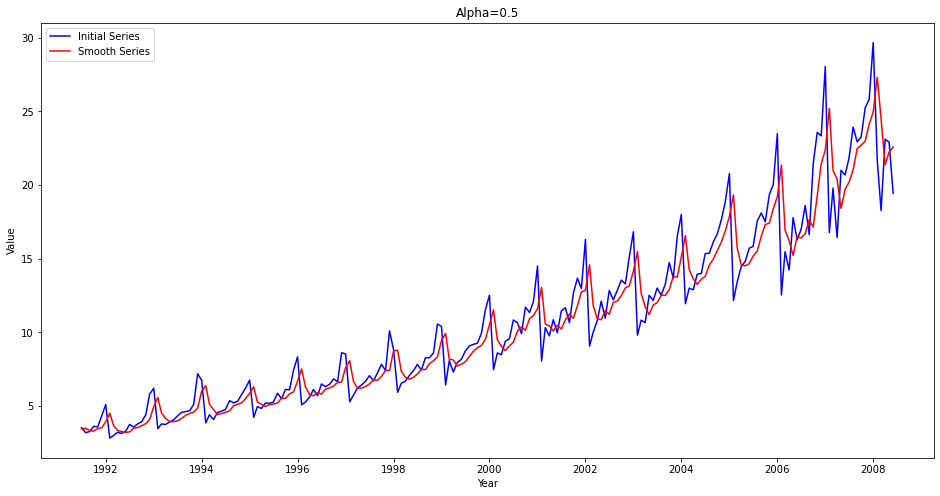

In [64]:
df_exp=df.copy()

exp_smooth=SimpleExpSmoothing(df_exp.value,
                              initial_level = df_exp.value.iloc[0],
                              initialization_method= 'known').fit(smoothing_level=0.5)
df_exp['SES'] = exp_smooth.fittedvalues

plt.figure(figsize=(16,8))
plt.xlabel('Year')
plt.ylabel('Value')
plt.title('Alpha=0.5')
line_1,=plt.plot(df_exp['value'],color='blue')
line_2,=plt.plot(df_exp['SES'],color='red')
plt.legend([line_1,line_2],['Initial Series','Smooth Series'])

plt.show()

## 3.3. Holt-Winters Smoothing (адаптивные сезонные модели)

Пусть имеется временной ряд $y_1, . . . , y_T$. Для этого ряда необходимо сделать прогноз на $h$ шагов вперёд. Общий вид прогноза выражается следующей формулой:

$$y_{t+h}=f_{t}+h×c_{t}+g_{t-p+1+(h-1)mod(p)}$$

Здесь $f_{t}$ - это  тренд, $c_{t}$ - это аддитивный рост тренда, $g_{t-p+1+(h-1)mod(p)}$ - аддитивная сезонность. Для них верны следующие реккурентные соотношения:

$$f_{t}=α(y_{t}-g_{t-p})+(1-α)(f_{t-1}+c_{t-1})$$
$$c_{t}=β(f_{t}-f_{t-1})+(1-β)c_{t-1}$$
$$g_{t}=γ(y_{t}-f_{t})+(1-γ)g_{t-p}$$

/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


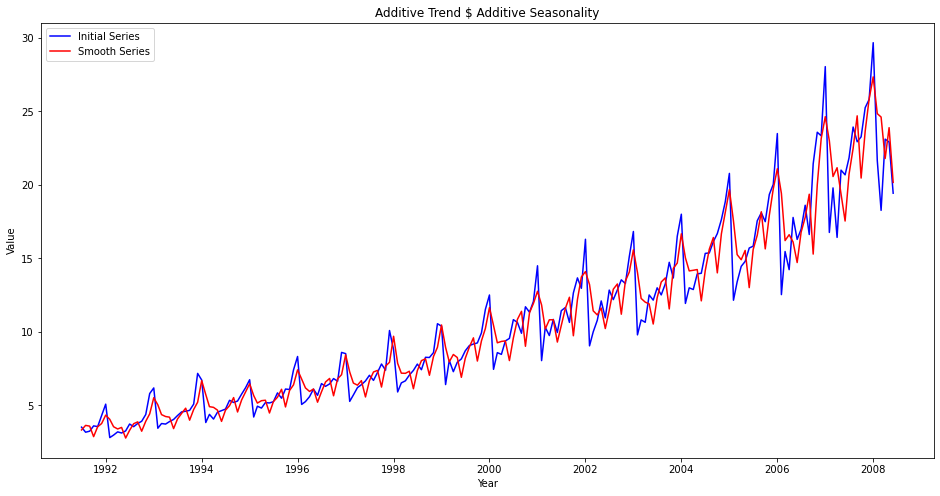

In [65]:
### Сглаживание
df_1=df.copy()
add_add = ExponentialSmoothing(
    df_1,
    seasonal_periods=4,
    trend="add",
    seasonal="add",
    use_boxcox=True,
    initialization_method="estimated",
).fit()

### График
plt.figure(figsize=(16,8))
plt.xlabel('Year')
plt.ylabel('Value')
plt.title("Additive Trend $ Additive Seasonality")
line_1,=plt.plot(df,color='blue')
line_2,=plt.plot(add_add.fittedvalues,color='red')
plt.legend([line_1,line_2],['Initial Series','Smooth Series'])

plt.show()

###### Аддитивный тренд и мультипликативная сезонность

Пусть имеется временной ряд $y_1, . . . , y_T$. Для этого ряда необходимо сделать прогноз на $h$ шагов вперёд. Общий вид прогноза выражается следующей формулой:

$$y_{t+h}=(f_{t}+h×c_{t}){×}m_{t-p+1+(h-1)mod(p)}$$

Здесь $f_{t}$ - это тренд, $c_{t}$ - это аддитивный рост тренда, $m_{t-p+1+(h-1)mod(p)}$ - мультипликативная сезонность. Для них верны следующие реккурентные соотношения:

$$f_{t}=α(\frac {y_{t}}{m_{t-p}})+(1-α)(f_{t-1}+c_{t-1})$$
$$c_{t}=β(f_{t}-f_{t-1})+(1-β)c_{t-1}$$
$$m_{t}=γ(y_{t}-f_{t})+(1-γ)m_{t-p}$$

/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


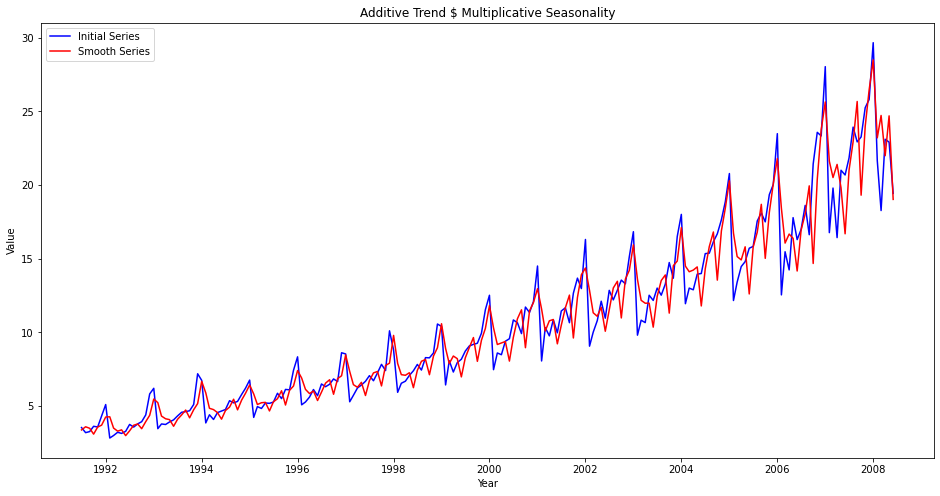

In [66]:
### Сглаживание
df_2=df.copy()
add_mult = ExponentialSmoothing(
    df_2,
    seasonal_periods=4,
    trend="add",
    seasonal="mul",
    use_boxcox=True,
    initialization_method="estimated",
).fit()

### График
plt.figure(figsize=(16,8))
plt.xlabel('Year')
plt.ylabel('Value')
plt.title("Additive Trend $ Multiplicative Seasonality")
line_1,=plt.plot(df,color='blue')
line_2,=plt.plot(add_mult.fittedvalues,color='red')
plt.legend([line_1,line_2],['Initial Series','Smooth Series'])

plt.show()

###### Мультипликативный тренд и аддитивная сезонность

Пусть имеется временной ряд $y_1, . . . , y_T$. Для этого ряда необходимо сделать прогноз на $h$ шагов вперёд. Общий вид прогноза выражается следующей формулой:

$$y_{t+h}=f_{t}×h×r_{t}+g_{t-p+1+(h-1)mod(p)}$$

Здесь $f_{t}$ - это тренд, $r_{t}$ - это мультипликативный рост тренда, $g_{t-p+1+(h-1)mod(p)}$ - аддитивная сезонность. Для них верны следующие реккурентные соотношения:

$$f_{t}=α(y_{t}-g_{t-p})+(1-α)(f_{t-1}×r_{t-1})$$
$$r_{t}=β(\frac{f_{t}}{f_{t-1}})+(1-β)r_{t-1}$$
$$g_{t}=γ(y_{t}-f_{t})+(1-γ)g_{t-p}$$

/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


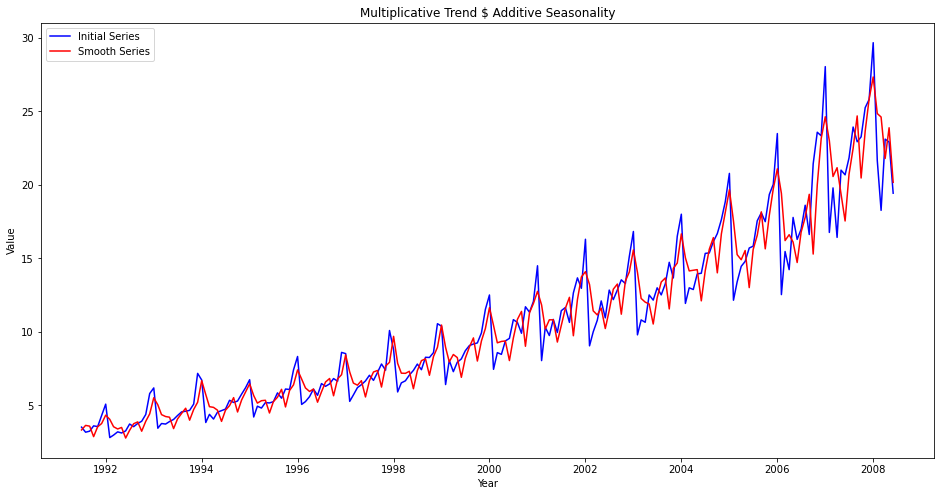

In [67]:
### Сглаживание
df_3=df.copy()
mult_add = ExponentialSmoothing(
    df_3,
    seasonal_periods=4,
    trend="mul",
    seasonal="add",
    use_boxcox=True,
    initialization_method="estimated",
).fit()

### График
plt.figure(figsize=(16,8))
plt.xlabel('Year')
plt.ylabel('Value')
plt.title("Multiplicative Trend $ Additive Seasonality")
line_1,=plt.plot(df,color='blue')
line_2,=plt.plot(mult_add.fittedvalues,color='red')
plt.legend([line_1,line_2],['Initial Series','Smooth Series'])

plt.show()

###### Мультипликативный тренд и мультипликативная сезонность

Пусть имеется временной ряд $y_1, . . . , y_T$. Для этого ряда необходимо сделать прогноз на $h$ шагов вперёд. Общий вид прогноза выражается следующей формулой:

$$y_{t+h}=f_{t}×h×r_{t}×m_{t-p+1+(h-1)mod(p)}$$

Здесь $f_{t}$ - это тренд, $r_{t}$ - это мультипликативный рост тренда, $m_{t-p+1+(h-1)mod(p)}$ - это мультипликативная сезонность. Для них верны следующие реккурентные соотношения:

$$f_{t}=α(\frac{y_{t}}{m_{t-p}})+(1-α)(f_{t-1}×r_{t-1})$$
$$r_{t}=β(\frac{f_{t}}{f_{t-1}})+(1-β)r_{t-1}$$
$$m_{t}=γ(\frac{y_{t}}{f_{t}})+(1-γ)m_{t-p}$$

/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


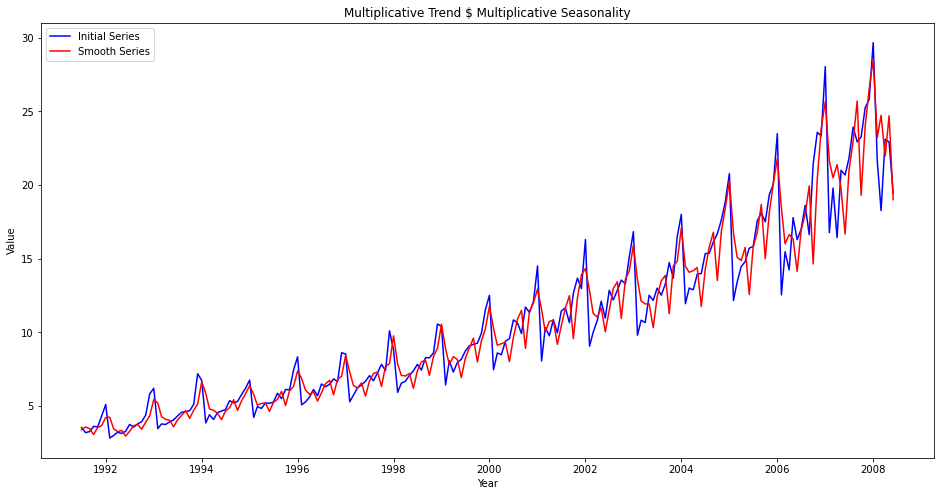

In [68]:
### Сглаживание
df_4=df.copy()
mult_mult = ExponentialSmoothing(
    df_4,
    seasonal_periods=4,
    trend="mul",
    seasonal="mul",
    use_boxcox=True,
    initialization_method="estimated",
).fit()

### График
plt.figure(figsize=(16,8))
plt.xlabel('Year')
plt.ylabel('Value')
plt.title("Multiplicative Trend $ Multiplicative Seasonality")
line_1,=plt.plot(df,color='blue')
line_2,=plt.plot(mult_mult.fittedvalues,color='red')
plt.legend([line_1,line_2],['Initial Series','Smooth Series'])

plt.show()

#### Общий график

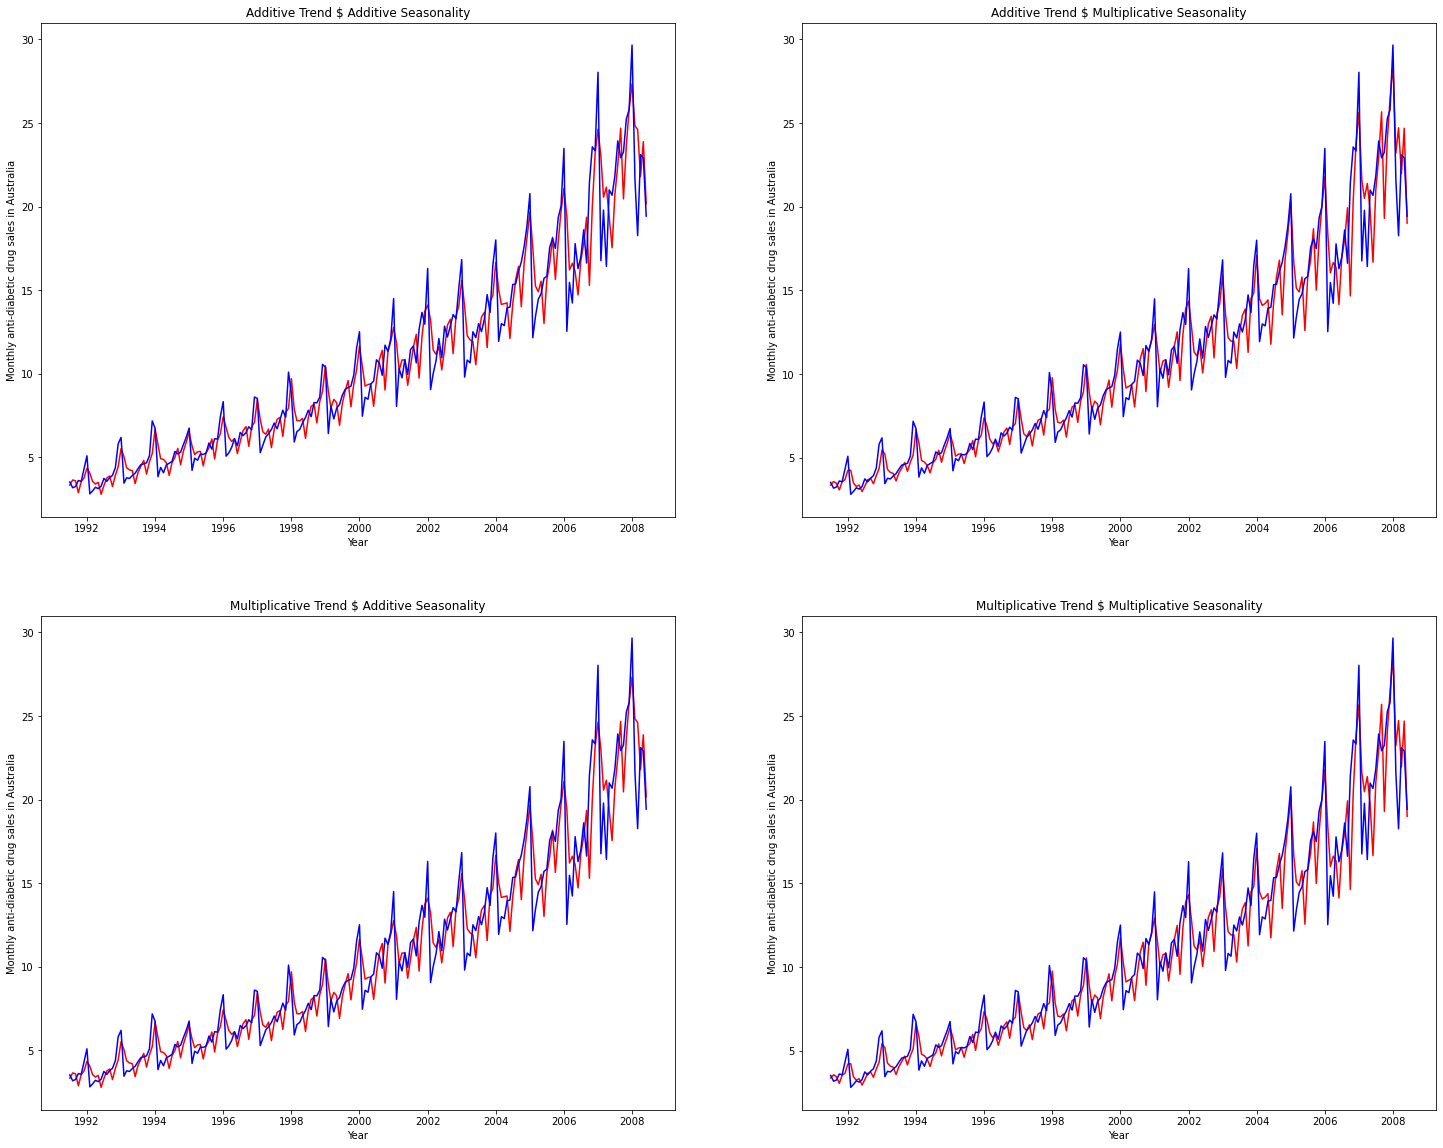

In [69]:
fig, axs = plt.subplots(2, 2, figsize=(25,20))

axs[0, 0].plot(add_add.fittedvalues,color='red')
axs[0, 0].plot(df,color='blue')
axs[0, 0].set_title('Additive Trend $ Additive Seasonality')
axs[0, 0].set_xlabel('Year')
axs[0, 0].set_ylabel('Monthly anti-diabetic drug sales in Australia')

axs[0, 1].plot(add_mult.fittedvalues,color='red')
axs[0, 1].plot(df,color='blue')
axs[0, 1].set_title('Additive Trend $ Multiplicative Seasonality')
axs[0, 1].set_xlabel('Year')
axs[0, 1].set_ylabel('Monthly anti-diabetic drug sales in Australia')

axs[1, 0].plot(mult_add.fittedvalues,color='red')
axs[1, 0].plot(df,color='blue')
axs[1, 0].set_title('Multiplicative Trend $ Additive Seasonality')
axs[1, 0].set_xlabel('Year')
axs[1, 0].set_ylabel('Monthly anti-diabetic drug sales in Australia')

axs[1, 1].plot(mult_mult.fittedvalues,color='red')
axs[1, 1].plot(df,color='blue')
axs[1, 1].set_title('Multiplicative Trend $ Multiplicative Seasonality')
axs[1, 1].set_xlabel('Year')
axs[1, 1].set_ylabel('Monthly anti-diabetic drug sales in Australia')

plt.show()

# Гармонический анализ

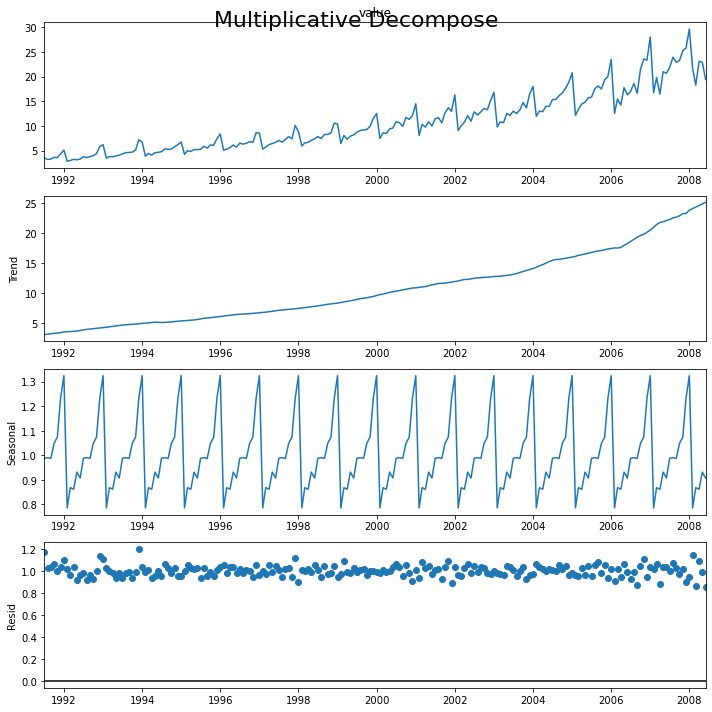

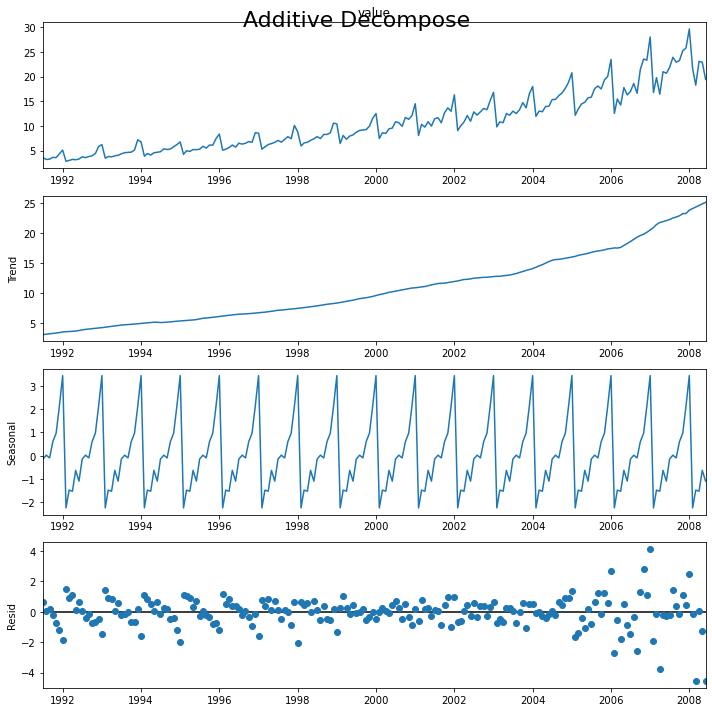

In [71]:
# Multiplicative Decomposition 
result_mul = seasonal_decompose(df['value'], model='multiplicative', extrapolate_trend='freq')

# Additive Decomposition
result_add = seasonal_decompose(df['value'], model='additive', extrapolate_trend='freq')

# Plot
plt.rcParams.update({'figure.figsize': (10,10)})
result_mul.plot().suptitle('Multiplicative Decompose', fontsize = 22)
result_add.plot().suptitle('Additive Decompose', fontsize = 22)
plt.show()

In [72]:
df_reconstructed = pd.concat([result_mul.seasonal, result_mul.trend, result_mul.resid, result_mul.observed], axis=1)
df_reconstructed.columns = ['seas', 'trend', 'resid', 'actual_values']
df_reconstructed.head()

,seas,trend,resid,actual_values
date,,,,
1991-07-01,0.987845,3.060085,1.166629,3.526591
1991-08-01,0.990481,3.124765,1.027745,3.180891
1991-09-01,0.987476,3.189445,1.032615,3.252221
1991-10-01,1.048329,3.254125,1.058513,3.611003
1991-11-01,1.074527,3.318805,0.999923,3.565869


In [76]:
fluctuations = df_reconstructed['actual_values'] / df_reconstructed['trend'] 
# или так: df_reconstructed['seas'] * df_reconstructed['resid']

# Найти ошибку в коде ниже

In [88]:
# T - четное
def period(df):
    a , b = [] , []
    
    a.append(df.mean()) # a_0 = mean(df)
    b.append(0)
    
    for j in range(1 , len(df)//2):
        p = 0
        q = 0
        for t in range(1, len(df) + 1):
            
            p = p + df[t - 1] * math.cos(2 * math.pi * j * t / len(df))
            q = q + df[t - 1] * math.sin(2 * math.pi * j * t / len(df))
        
        
                
        a.append(2 / len(df) * p) # Коэффициенты Alpha_j (Всего их T/2)
        b.append(2 / len(df) * q) # Коэффициенты Beta_j (Всего их T/2)
        
    T_2 = 0
    for t in range(1, len(df) + 1):
        T_2 += 1/len(df)*(-1)**t * df[t-1]
    
    a.append(T_2)
    b.append(0)
            
    periodogramma = []
    
    for i in range(len(a)):
        
        I_j = (a[i] ** 2 + b[i] ** 2) * len(df) // 2 # Интенсивность для j-й гармоники
        
        periodogramma.append(I_j)
    
    # Разложение исходного ряда в ряд Фурье
    Furie = []
    for t in range(1 , len(df) + 1):
        x = 0
        for j in range(len(a)):
            x+= a[j] * math.cos(2 * math.pi * j * t/len(df)) + b[j] * math.cos(2 * math.pi * j * t/len(df))
        Furie.append(x)
    return a, b, periodogramma, Furie

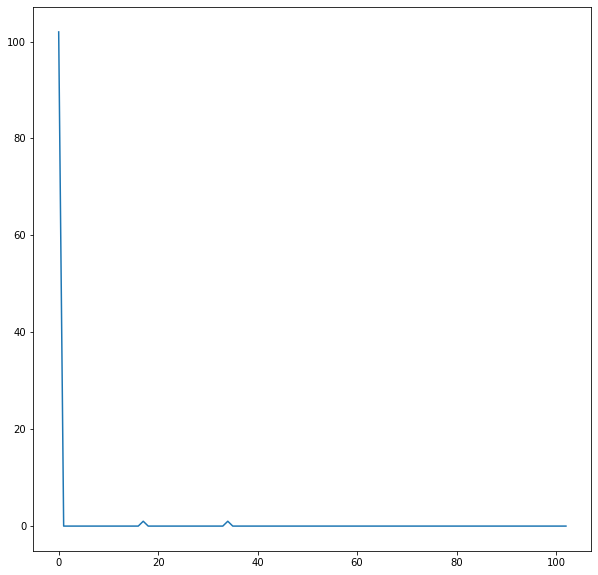

In [93]:
plt.plot(period(fluctuations)[2])

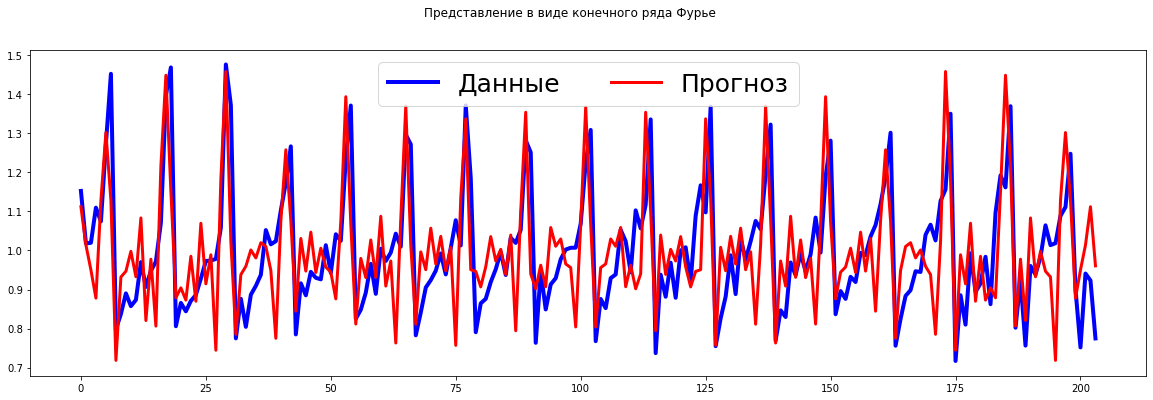

In [89]:
y1 = list(fluctuations) # исходный ряд
y2 = period(fluctuations)[-1] # ряд Фурье
fig , ax = plt.subplots()
plt.plot(range(len(y1)), y1 , c = 'blue' , linewidth = 4 ,label ='Данные')
plt.plot(range(len(y2)), y2, c = 'red', linewidth = 3,label ='Прогноз')
ax.legend(loc = 'upper center' , fontsize = 25 , ncol = 2 )
fig.set_figwidth(20)
fig.set_figheight(6)
fig.suptitle("Представление в виде конечного ряда Фурье")
plt.show()